In [1]:
from google.colab import files
#path
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

to upload file:

In [2]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
! pwd
os.environ['KAGGLE_CONFICT_DIR']='/content'
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

/content


In [52]:
!kaggle datasets download -d grassknoted/multidomain-image-characteristics-dataset

 98% 132M/135M [00:00<00:00, 186MB/s]
100% 135M/135M [00:00<00:00, 169MB/s]


In [53]:
! unzip multidomain-image-characteristics-dataset.zip

Archive:  multidomain-image-characteristics-dataset.zip
  inflating: Dataset/Animals/animals.ods  
  inflating: Dataset/Animals/cats/cat1.jpg  
  inflating: Dataset/Animals/cats/cat10.jpg  
  inflating: Dataset/Animals/cats/cat100.jpg  
  inflating: Dataset/Animals/cats/cat101.jpg  
  inflating: Dataset/Animals/cats/cat102.jpg  
  inflating: Dataset/Animals/cats/cat103.jpg  
  inflating: Dataset/Animals/cats/cat104.jpg  
  inflating: Dataset/Animals/cats/cat105.jpg  
  inflating: Dataset/Animals/cats/cat106.jpg  
  inflating: Dataset/Animals/cats/cat107.jpg  
  inflating: Dataset/Animals/cats/cat108.jpg  
  inflating: Dataset/Animals/cats/cat109.jpg  
  inflating: Dataset/Animals/cats/cat11.jpg  
  inflating: Dataset/Animals/cats/cat110.jpg  
  inflating: Dataset/Animals/cats/cat111.jpg  
  inflating: Dataset/Animals/cats/cat112.jpg  
  inflating: Dataset/Animals/cats/cat113.jpg  
  inflating: Dataset/Animals/cats/cat114.jpg  
  inflating: Dataset/Animals/cats/cat115.jpg  
  inflating:

Read Birds Dataset:

In [110]:
#dataset path:
train_path=Path(r'/content/Dataset/Birds/parrots')

# file path for all pngs -> to list png [1.png,2.png,.....]
train_file=list(train_path.glob(r'**/*.jpg'))

# lambda function to get labels of images
#train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_file))
train_labels=[]
for i in train_file:
  train_labels.append(0)
# traing data path converted to pandas
train_file = pd.Series(train_file).astype(str)
train_labels=pd.Series(train_labels).astype(str)


df_train = pd.concat([train_file, train_labels], axis=1)
df_train.columns = ['image', 'label']
print(df_train.head())
print('\n')


                                          image label
0   /content/Dataset/Birds/parrots/parrot92.jpg     0
1  /content/Dataset/Birds/parrots/parrot175.jpg     0
2   /content/Dataset/Birds/parrots/parrot41.jpg     0
3   /content/Dataset/Birds/parrots/parrot54.jpg     0
4   /content/Dataset/Birds/parrots/parrot30.jpg     0




Upload Other Dataset:

In [55]:
uploaded = files.upload()

Saving others.zip to others.zip


In [56]:
! unzip others.zip

Archive:  others.zip
   creating: others/
  inflating: others/photo-1433162653888-a571db5ccccf.jpg  
  inflating: others/photo-1458571037713-913d8b481dc6.jpg  
  inflating: others/photo-1459255418679-d6424da9ee33.jpg  
  inflating: others/photo-1461800919507-79b16743b257.jpg  
  inflating: others/photo-1461896836934-ffe607ba8211.jpg  
  inflating: others/photo-1464695110811-dcf3903dc2f4.jpg  
  inflating: others/photo-1470058869958-2a77ade41c02.jpg  
  inflating: others/photo-1471086569966-db3eebc25a59.jpg  
  inflating: others/photo-1471897488648-5eae4ac6686b (1).jpg  
  inflating: others/photo-1471897488648-5eae4ac6686b.jpg  
  inflating: others/photo-1471899236350-e3016bf1e69e.jpg  
  inflating: others/photo-1485470733090-0aae1788d5af.jpg  
  inflating: others/photo-1485550409059-9afb054cada4.jpg  
  inflating: others/photo-1488900128323-21503983a07e.jpg  
  inflating: others/photo-1496449903678-68ddcb189a24.jpg  
  inflating: others/photo-1497034825429-c343d7c6a68f.jpg  
  inflatin

Read Other Dataset:

In [111]:
#dataset path:
train_path2=Path(r'/content/others')

# file path for all pngs -> to list png [1.png,2.png,.....]
train_file2=list(train_path2.glob(r'**/*.jpg'))

# lambda function to get labels of images
#train_labels2 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_file2))
train_labels2=[]
for i in train_file2:
  train_labels2.append(1)

# traing data path converted to pandas
train_file2 = pd.Series(train_file2).astype(str)
train_labels2=pd.Series(train_labels2).astype(str)

df_train2 = pd.concat([train_file2, train_labels2], axis=1)
df_train2.columns = ['image', 'label']
print(df_train2.head())
print('\n')



                                               image label
0  /content/others/photo-1550686041-366ad85a1355.jpg     1
1  /content/others/photo-1558090056-c994bfb27e14.jpg     1
2  /content/others/photo-1533602747409-1f3dea118a...     1
3  /content/others/photo-1551106652-a5bcf4b29ab6.jpg     1
4  /content/others/photo-1554124819-e6a2f5eed22b.jpg     1




Combine Birds and Other DataFrame:

In [109]:
#del df_train

In [112]:
df_train=df_train.append(df_train2)

In [113]:
df_train.label.value_counts()

0    200
1    200
Name: label, dtype: int64

Split Data:

In [114]:
df_train,df_test=train_test_split(df_train,test_size=0.3,random_state=42)
df_train,df_val=train_test_split(df_train,test_size=0.1,random_state=42)
print('shape of training:',df_train.shape)
print('shape of validation:',df_val.shape)
print('shape of testing:',df_test.shape)

shape of training: (252, 2)
shape of validation: (28, 2)
shape of testing: (120, 2)


In [23]:
#del df_train
#del df_test

Lables Count in Dataframe:

In [115]:
#count of lables in dataframe
print('training set:')
print(df_train.label.value_counts())

print('test set:')
df_test.label.value_counts()

training set:
0    126
1    126
Name: label, dtype: int64
test set:


0    62
1    58
Name: label, dtype: int64

Convert Dataset to Numpy:

In [30]:
import numpy as np
df_train_t=np.array(df_train).astype(np.int64)
df_test_t=np.array(df_test).astype(np.int64)

ValueError: ignored

for birds:



AttributeError: ignored

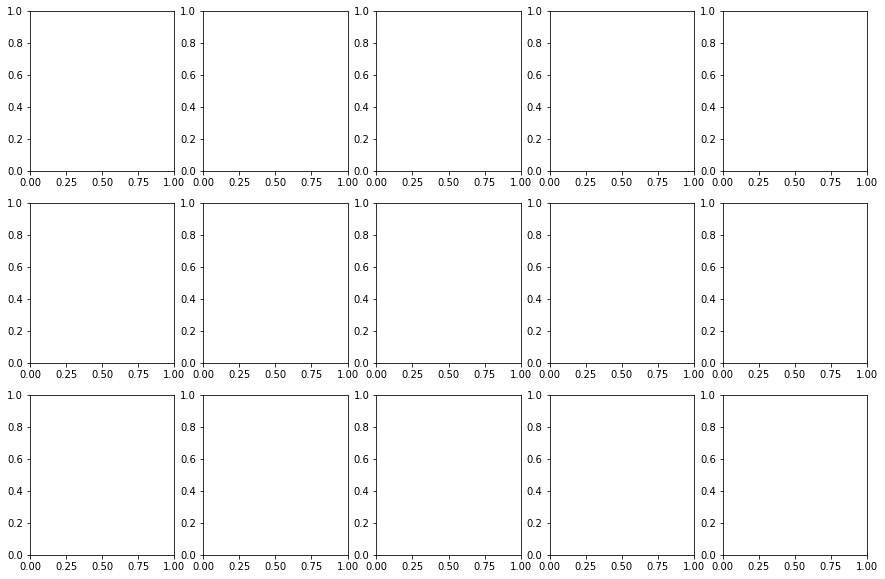

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))
print('for birds:\n')
for i, ax in enumerate(axes.flat):
    ### Image show 
    ### plt imread reads images from dataframe image path
    ax.imshow(plt.imread(df_train.image[i]))
    ### set title of data frame label
    ax.set_title(df_train.label[i])
plt.show()

fig, axes2 = plt.subplots(nrows=3, ncols=5, figsize=(15,10))
print('\n for others:\n')
for i, ax in enumerate(axes2.flat):
    ax.imshow(plt.imread(df_train.image[i+250]))

    ax.set_title(df_train.label[i+4005])
plt.show()

Data Augmentation:

In [118]:
image_data_generator = ImageDataGenerator(
      rescale = 1./255,#[0,1]
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'#padding
      )
train=image_data_generator.flow_from_dataframe(dataframe=df_train,x_col='image',y_col='label',class_mode='binary',target_size=(200,200),color_mode='rgb',shuffle=False)
test=image_data_generator.flow_from_dataframe(dataframe=df_test,x_col='image',y_col='label',class_mode='binary',target_size=(200,200),color_mode='rgb',shuffle=False)
val=image_data_generator.flow_from_dataframe(dataframe=df_val,x_col='image',y_col='label',class_mode='binary',target_size=(200,200),color_mode='rgb',shuffle=False)

Found 252 validated image filenames belonging to 2 classes.
Found 120 validated image filenames belonging to 2 classes.
Found 28 validated image filenames belonging to 2 classes.


Input Shape of Dataset:

In [69]:
input_shape = (200, 200, 3)

Parameters:

In [74]:
# Model configuration
batch_size = 100
no_epochs = 50
learning_rate = 0.001
no_classes = 10
verbosity = 1

Model Defination:

In [119]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape,padding='same' ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same' ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same' ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same' ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 conv2d_27 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 50, 50, 64)       

In [77]:
import tensorflow
from tensorflow.keras.optimizers import Adam

In [120]:
# Compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
#Call back:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

# Fit data to model
history = model.fit(train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data=val)

Epoch 1/50
8/8 [==============================] - 5s 515ms/step - loss: 3.0363 - accuracy: 0.5476 - val_loss: 0.6920 - val_accuracy: 0.5714
Epoch 2/50
8/8 [==============================] - 3s 434ms/step - loss: 0.6912 - accuracy: 0.5357 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 4s 444ms/step - loss: 0.6844 - accuracy: 0.5159 - val_loss: 0.6935 - val_accuracy: 0.5714
Epoch 4/50
8/8 [==============================] - 5s 627ms/step - loss: 0.6741 - accuracy: 0.5873 - val_loss: 0.7206 - val_accuracy: 0.4643
Epoch 5/50
8/8 [==============================] - 4s 455ms/step - loss: 0.6928 - accuracy: 0.6071 - val_loss: 0.6863 - val_accuracy: 0.7143
Epoch 6/50
8/8 [==============================] - 4s 446ms/step - loss: 0.6096 - accuracy: 0.7540 - val_loss: 0.7797 - val_accuracy: 0.6071
Epoch 7/50
8/8 [==============================] - 3s 431ms/step - loss: 0.5999 - accuracy: 0.7381 - val_loss: 0.7060 - val_accuracy: 0.6786
Epoch 8/50
8/8 [====

In [121]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [99]:


model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 99, 99, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 32)      

In [101]:
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model2.fit(train, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
24/24 [==============================] - 12s 463ms/step - loss: 1.7963 - accuracy: 0.1693 - val_loss: 1.7925 - val_accuracy: 0.0595
Epoch 2/50
24/24 [==============================] - 11s 442ms/step - loss: 1.7905 - accuracy: 0.1640 - val_loss: 1.7734 - val_accuracy: 0.1786
Epoch 3/50
24/24 [==============================] - 11s 446ms/step - loss: 1.7506 - accuracy: 0.2103 - val_loss: 1.6757 - val_accuracy: 0.2500
Epoch 4/50
24/24 [==============================] - 11s 450ms/step - loss: 1.6997 - accuracy: 0.2606 - val_loss: 1.6265 - val_accuracy: 0.1905
Epoch 5/50
24/24 [==============================] - 11s 427ms/step - loss: 1.6785 - accuracy: 0.2434 - val_loss: 1.7359 - val_accuracy: 0.1548
Epoch 6/50
24/24 [==============================] - 11s 438ms/step - loss: 1.6936 - accuracy: 0.2593 - val_loss: 1.6129 - val_accuracy: 0.2738
Epoch 7/50
24/24 [==============================] - 11s 440ms/step - loss: 1.6863 - accuracy: 0.2910 - val_loss: 1.6106 - val_accuracy: 0.2738

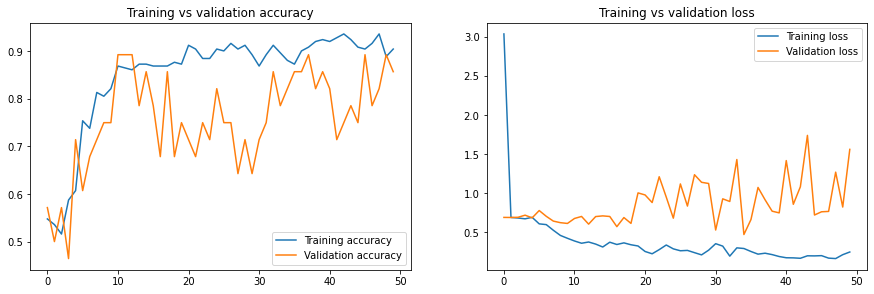

In [123]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [127]:
labels = train.class_indices
labels

{'0': 0, '1': 1}

In [128]:
pred=model.predict(test)
import numpy as np
pred = np.argmax(pred, axis=1)
labels = dict((v,k) for k, v in labels.items())
y_pred = [labels[k] for k in pred]

In [89]:
labels

{0: 'ducks', 1: 'eagles', 2: 'hawks', 3: 'others', 4: 'parrots', 5: 'sparrows'}

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
print(classification_report(df_test.label, y_pred))
print(confusion_matrix(df_test.label, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68        62
           1       0.00      0.00      0.00        58

    accuracy                           0.52       120
   macro avg       0.26      0.50      0.34       120
weighted avg       0.27      0.52      0.35       120

[[62  0]
 [58  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Image Testing:

In [82]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 200, 200, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.jpg')
	# load model
	#model = load_model('model5-1.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

[1.3897338e-09 3.4965950e-29 2.1567808e-28 2.4339270e-25 1.0000000e+00
 1.8212890e-15]
